In [1]:
from sklearn.decomposition import PCA
import numpy as np
import itertools
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_bloch_multivector, array_to_latex

In [2]:
import numpy as np

#example_matrix = np.array([[1.5, 0.5], [0.5, 1.5]])
example_matrix = np.array([[0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 2, 0], [0, 0, 0, 3]])
sum_squares = (example_matrix**2).sum()

input_probabilities = []
for x in example_matrix:
    for y in x:
        input_probabilities.append((y**2)/sum_squares)
input_probabilities=np.array(input_probabilities)

In [3]:
input_probabilities

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07142857, 0.        , 0.        , 0.        , 0.        ,
       0.28571429, 0.        , 0.        , 0.        , 0.        ,
       0.64285714])

In [4]:
resolution=len(example_matrix)
resolution

4

In [5]:
lst_combination=[]

for k in range(1,resolution+1):
    lst_combination.append(list(map(list, itertools.product([0, 1], repeat=k))))
container=[]
for lst in lst_combination:
    container.append([''.join([''.join(str(j)) for j in i]) for i in lst])
all_combinations=[item for c in container for item in c]

all_combinations

['0',
 '1',
 '00',
 '01',
 '10',
 '11',
 '000',
 '001',
 '010',
 '011',
 '100',
 '101',
 '110',
 '111',
 '0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

In [6]:
general_bitstring=[''.join([''.join(str(j)) for j in i]) for i in list(map(list, itertools.product([0, 1], repeat=resolution)))]
general_bitstring

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

In [7]:
#Nodes contains all the values of the tree (except for the root)
nodes=[]
for st in all_combinations:
    #print(st)
    starts = [general_bitstring.index(l) for l in general_bitstring if l.startswith(st)]
    #print(starts)
    print(st,'->',np.sqrt(input_probabilities[starts].sum()))
    nodes.append(np.sqrt(input_probabilities[starts].sum()))
        
        

0 -> 0.2672612419124244
1 -> 0.9636241116594315
00 -> 0.0
01 -> 0.2672612419124244
10 -> 0.5345224838248488
11 -> 0.8017837257372732
000 -> 0.0
001 -> 0.0
010 -> 0.2672612419124244
011 -> 0.0
100 -> 0.0
101 -> 0.5345224838248488
110 -> 0.0
111 -> 0.8017837257372732
0000 -> 0.0
0001 -> 0.0
0010 -> 0.0
0011 -> 0.0
0100 -> 0.0
0101 -> 0.2672612419124244
0110 -> 0.0
0111 -> 0.0
1000 -> 0.0
1001 -> 0.0
1010 -> 0.5345224838248488
1011 -> 0.0
1100 -> 0.0
1101 -> 0.0
1110 -> 0.0
1111 -> 0.8017837257372732


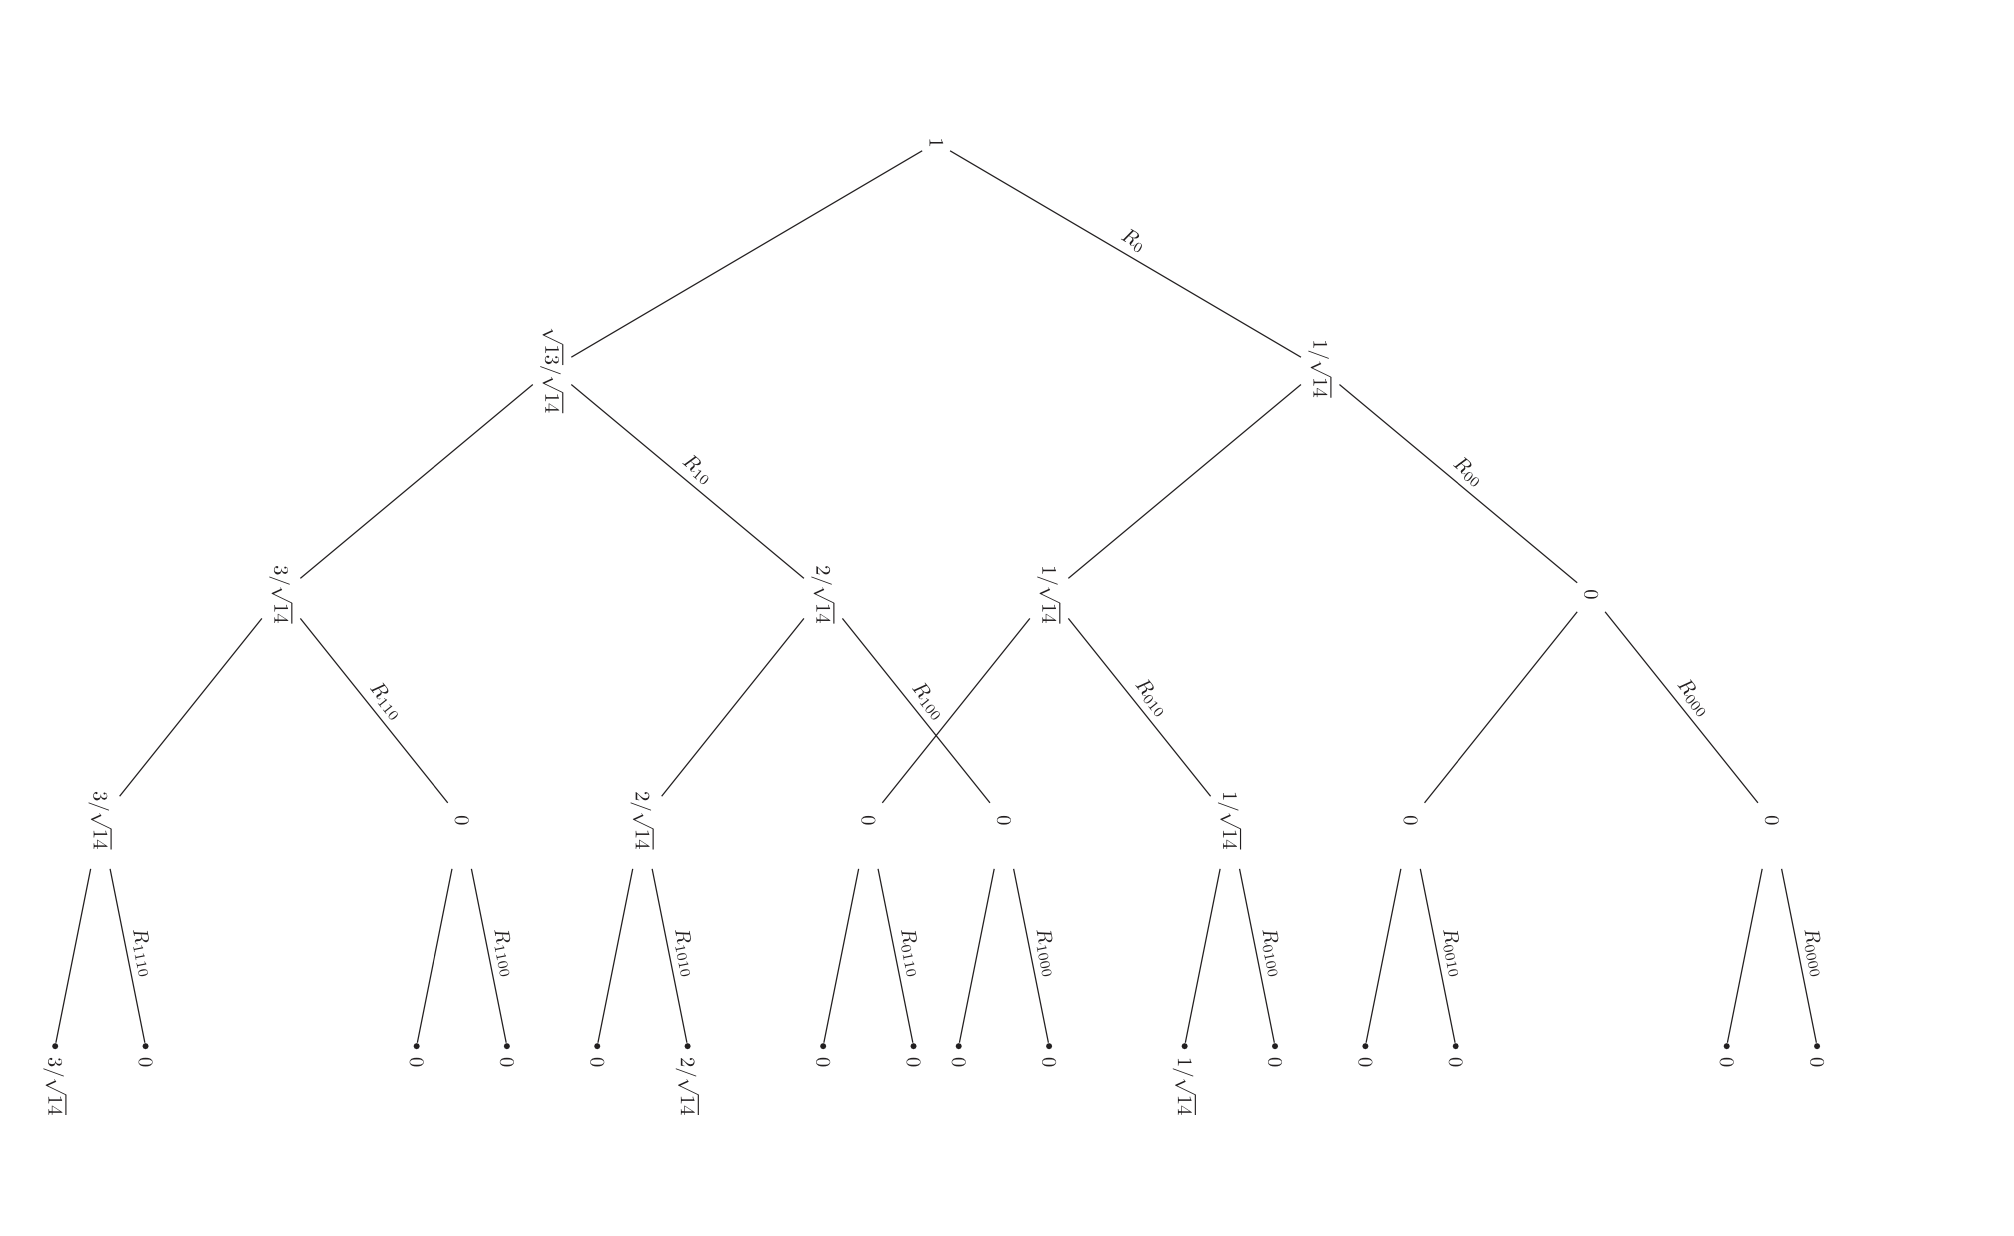

In [8]:
from IPython import display
display.Image("Qram.png")

In [9]:
#add root tree
nodes.insert(0, 1)

In [10]:
idx_sub=1
thetas=[]
for i in range(len(nodes)-len(input_probabilities)):
    right_node=i+idx_sub
    left_node=right_node+1
    #print(left_node,right_node)
    if nodes[i]!=0:
        #print(nodes[right_node],nodes[i])
        thetas.append(2*np.arccos(nodes[right_node]/nodes[i]))
        thetas.append(2*np.arcsin(nodes[left_node]/nodes[i]))
    else:
        thetas.append(0)
        thetas.append(0)
        
    idx_sub+=1

In [11]:
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

for idx,th in zip(all_combinations,thetas):
    print('\u03F4(R{})'.format((str(idx).translate(SUB))),'->', th)

ϴ(R₀) -> 2.6004931276326473
ϴ(R₁) -> 2.6004931276326473
ϴ(R₀₀) -> 3.141592653589793
ϴ(R₀₁) -> 3.141592653589793
ϴ(R₁₀) -> 1.965587446494658
ϴ(R₁₁) -> 1.9655874464946583
ϴ(R₀₀₀) -> 0
ϴ(R₀₀₁) -> 0
ϴ(R₀₁₀) -> 0.0
ϴ(R₀₁₁) -> 0.0
ϴ(R₁₀₀) -> 3.141592653589793
ϴ(R₁₀₁) -> 3.141592653589793
ϴ(R₁₁₀) -> 3.141592653589793
ϴ(R₁₁₁) -> 3.141592653589793
ϴ(R₀₀₀₀) -> 0
ϴ(R₀₀₀₁) -> 0
ϴ(R₀₀₁₀) -> 0
ϴ(R₀₀₁₁) -> 0
ϴ(R₀₁₀₀) -> 3.141592653589793
ϴ(R₀₁₀₁) -> 3.141592653589793
ϴ(R₀₁₁₀) -> 0
ϴ(R₀₁₁₁) -> 0
ϴ(R₁₀₀₀) -> 0
ϴ(R₁₀₀₁) -> 0
ϴ(R₁₀₁₀) -> 0.0
ϴ(R₁₀₁₁) -> 0.0
ϴ(R₁₁₀₀) -> 0
ϴ(R₁₁₀₁) -> 0
ϴ(R₁₁₁₀) -> 3.141592653589793
ϴ(R₁₁₁₁) -> 3.141592653589793
